CHURN PREDICTION

Data Analysis

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

dataset = pd.read_csv("Telco-Customer-Churn.csv")

In [59]:
dataset.shape

(7043, 21)

In [60]:
dataset.isnull().sum()              #checking for null values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [61]:
dataset.Churn.value_counts()        

No     5174
Yes    1869
Name: Churn, dtype: int64

In [62]:
#checking for binary columns
columns = dataset.columns
binary_columns = []

for cl in columns:
  if dataset[cl].value_counts().shape[0] == 2:
    binary_columns.append(cl)
print(binary_columns)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

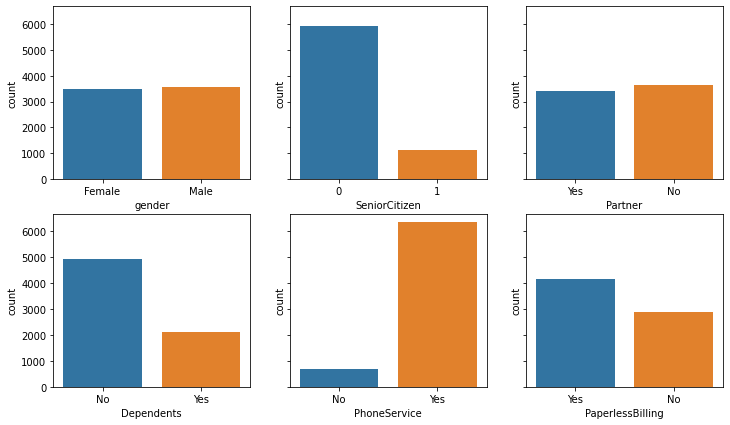

In [63]:
#class distribution of categorical features
fig, axes = plt.subplots(2,3, figsize=(12,7), sharey = True)
sns.countplot("gender", data = dataset, ax=axes[0,0])
sns.countplot("SeniorCitizen", data = dataset, ax=axes[0,1])
sns.countplot("Partner", data = dataset, ax=axes[0,2])
sns.countplot("Dependents", data = dataset, ax=axes[1,0])
sns.countplot("PhoneService", data = dataset, ax=axes[1,1])
sns.countplot("PaperlessBilling", data = dataset, ax=axes[1,2])

In [64]:
churn_num = {'Yes':1, 'No':0}
dataset.Churn.replace(churn_num, inplace = True)

In [65]:
dataset[['gender','Churn']].groupby(['gender']).mean()

,Churn
gender,
Female,0.269209
Male,0.261603


In [66]:
dataset[['SeniorCitizen','Churn']].groupby(['SeniorCitizen']).mean()

,Churn
SeniorCitizen,
0,0.236062
1,0.416813


In [67]:
dataset[['Partner','Churn']].groupby(['Partner']).mean()

,Churn
Partner,
No,0.329580
Yes,0.196649


In [68]:
dataset[['Dependents','Churn']].groupby(['Dependents']).mean()

,Churn
Dependents,
No,0.312791
Yes,0.154502


In [69]:
dataset[['PhoneService','Churn']].groupby(['PhoneService']).mean()

,Churn
PhoneService,
No,0.249267
Yes,0.267096


In [70]:
dataset[['PaperlessBilling','Churn']].groupby(['PaperlessBilling']).mean()

,Churn
PaperlessBilling,
No,0.163301
Yes,0.335651


In [71]:
table = pd.pivot_table(dataset, values='Churn', index=['gender'], columns=['SeniorCitizen'], aggfunc=np.mean)
table

SeniorCitizen,0,1
gender,,
Female,0.239384,0.422535
Male,0.232808,0.411150


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


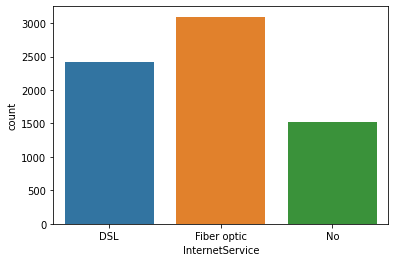

In [72]:
sns.countplot("InternetService", data=dataset)

In [73]:
dataset[['InternetService','Churn']].groupby('InternetService').mean()

,Churn
InternetService,
DSL,0.189591
Fiber optic,0.418928
No,0.074050


In [74]:
dataset[['InternetService','MonthlyCharges']].groupby('InternetService').mean()

,MonthlyCharges
InternetService,
DSL,58.102169
Fiber optic,91.500129
No,21.079194


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

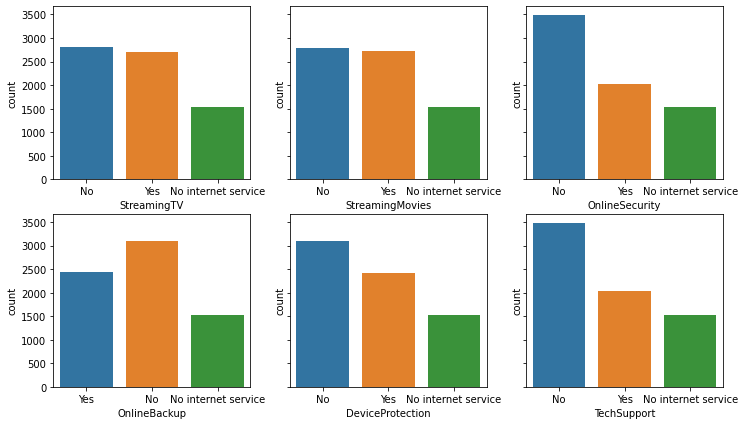

In [75]:
fig, axes = plt.subplots(2,3, figsize=(12,7), sharey = True)
sns.countplot("StreamingTV", data=dataset, ax=axes[0,0])
sns.countplot("StreamingMovies", data=dataset, ax=axes[0,1])
sns.countplot("OnlineSecurity", data=dataset, ax=axes[0,2])
sns.countplot("OnlineBackup", data=dataset, ax=axes[1,0])
sns.countplot("DeviceProtection", data=dataset, ax=axes[1,1])
sns.countplot("TechSupport", data=dataset, ax=axes[1,2])

In [76]:
churn_num = {'Yes':1, 'No':0}
dataset.Churn.replace(churn_num, inplace = True)

In [77]:
dataset[['StreamingTV','Churn']].groupby(['StreamingTV']).mean()

,Churn
StreamingTV,
No,0.335231
No internet service,0.074050
Yes,0.300702


In [78]:
dataset[['StreamingMovies','Churn']].groupby(['StreamingMovies']).mean()

,Churn
StreamingMovies,
No,0.336804
No internet service,0.074050
Yes,0.299414


In [79]:
dataset[['OnlineSecurity','Churn']].groupby(['OnlineSecurity']).mean()

,Churn
OnlineSecurity,
No,0.417667
No internet service,0.074050
Yes,0.146112


In [80]:
dataset[['OnlineBackup','Churn']].groupby(['OnlineBackup']).mean()

,Churn
OnlineBackup,
No,0.399288
No internet service,0.074050
Yes,0.215315


In [81]:
dataset[['DeviceProtection','Churn']].groupby(['DeviceProtection']).mean()

,Churn
DeviceProtection,
No,0.391276
No internet service,0.074050
Yes,0.225021


In [82]:
dataset[['TechSupport','Churn']].groupby(['TechSupport']).mean()

,Churn
TechSupport,
No,0.416355
No internet service,0.074050
Yes,0.151663


In [83]:
dataset.PhoneService.value_counts()   

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [84]:
dataset.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [85]:
dataset[['MultipleLines','Churn']].groupby('MultipleLines').mean()

,Churn
MultipleLines,
No,0.250442
No phone service,0.249267
Yes,0.286099


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


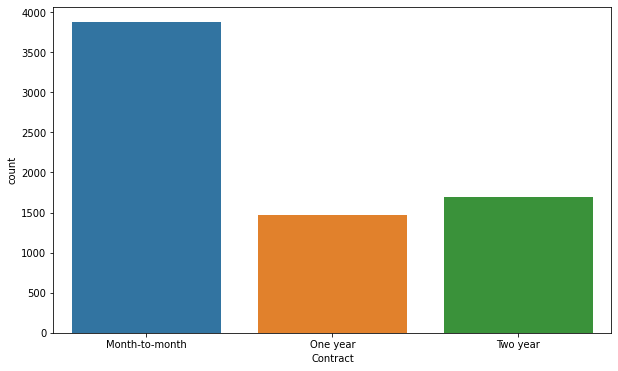

In [86]:
plt.figure(figsize=(10,6))
sns.countplot("Contract",data=dataset)

In [87]:
dataset[['Contract','Churn']].groupby('Contract').mean()

,Churn
Contract,
Month-to-month,0.427097
One year,0.112695
Two year,0.028319


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


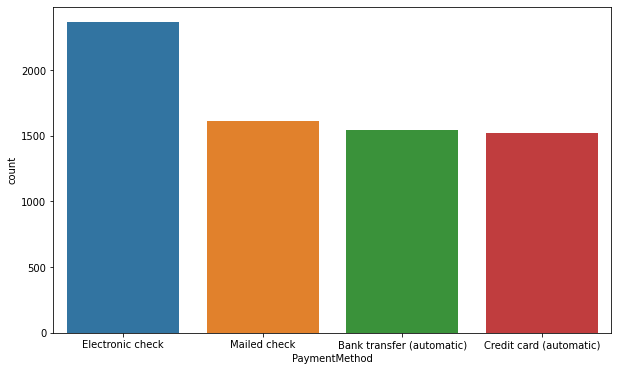

In [88]:
plt.figure(figsize=(10,6))
sns.countplot("PaymentMethod",data=dataset)

In [89]:
dataset[['PaymentMethod','Churn']].groupby('PaymentMethod').mean()

,Churn
PaymentMethod,
Bank transfer (automatic),0.167098
Credit card (automatic),0.152431
Electronic check,0.452854
Mailed check,0.191067


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


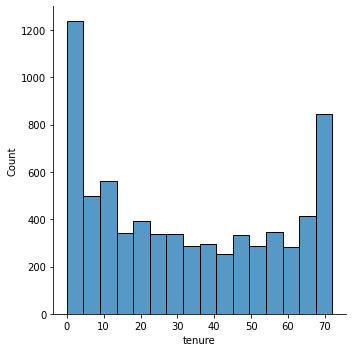

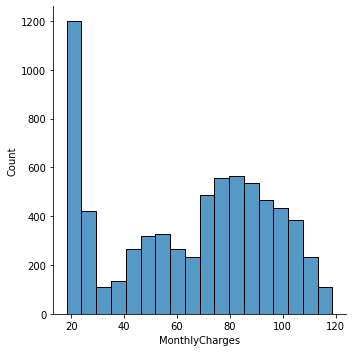

In [90]:
#Looking at continuous features

#fig, axes = plt.subplots(1,2 ,figsize=(12,7))
sns.displot(dataset["tenure"],ax=axes[0])
sns.displot(dataset["MonthlyCharges"],ax=axes[1])

In [91]:
dataset[['tenure','MonthlyCharges','Churn']].groupby('Churn').mean()

,tenure,MonthlyCharges
Churn,,
0,37.569965,61.265124
1,17.979133,74.441332


In [92]:
dataset[['Contract','tenure']].groupby('Contract').mean()

,tenure
Contract,
Month-to-month,18.036645
One year,42.044807
Two year,56.735103


In [93]:
dataset.drop(['customerID','gender','PhoneService','Contract','TotalCharges'],axis=1,inplace=True)

In [94]:
dataset

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Yes,Electronic check,29.85,0
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,No,Mailed check,56.95,0
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Yes,Mailed check,53.85,1
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,No,Bank transfer (automatic),42.30,0
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Yes,Electronic check,70.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Yes,Yes,24,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes,Mailed check,84.80,0
7039,0,Yes,Yes,72,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes,Credit card (automatic),103.20,0
7040,0,Yes,Yes,11,No phone service,DSL,Yes,No,No,No,No,No,Yes,Electronic check,29.60,0
7041,1,Yes,No,4,Yes,Fiber optic,No,No,No,No,No,No,Yes,Mailed check,74.40,1


Data Preprocessing

In [95]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [96]:
#Encoding categorical data

cat_features = ['SeniorCitizen','Partner','Dependents','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','PaymentMethod']
X = pd.get_dummies(dataset, columns=cat_features, drop_first=True)

In [97]:
#scaling continuous variables

sc = MinMaxScaler()
a = sc.fit_transform(dataset[['tenure']])
b = sc.fit_transform(dataset[['MonthlyCharges']])
X['tenure']=a
X['Monthlycharges']=b

In [98]:
X.shape

(7043, 27)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distribution before Resampling')

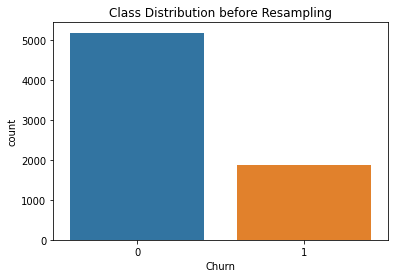

In [99]:
sns.countplot('Churn', data=dataset).set_title('Class Distribution before Resampling')

In [100]:
X_no = X[X.Churn == 0]
X_yes = X[X.Churn == 1]

In [101]:
X_yes_unsampled = X_yes.sample(n=len(X_no), replace=True, random_state = 42)
print(len(X_yes_unsampled))

5174


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distribution AFTER RESAMPLING')

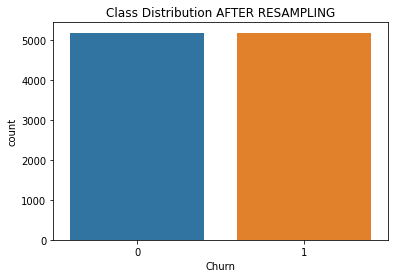

In [102]:
X_unsampled = X_no.append(X_yes_unsampled).reset_index(drop=True)
sns.countplot('Churn', data=X_unsampled).set_title('Class Distribution AFTER RESAMPLING')

Model Creation

In [103]:
from sklearn.model_selection import train_test_split
X = X_unsampled.drop(['Churn'],axis=1)
y = X_unsampled['Churn'] 

In [104]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [105]:
#random forest

from sklearn.ensemble import RandomForestClassifier

classifier2 = RandomForestClassifier(n_estimators=100, max_depth=10)
classifier2.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

In [106]:
pred = classifier2.predict(X_test)
accuracy_score(y_test, pred)

0.8463768115942029

In [107]:
pred_test = classifier2.predict(X_test)
accuracy_score(y_test, pred_test)

0.8463768115942029

Improving the model using GridSearchCV

In [108]:
from sklearn.model_selection import GridSearchCV
#creating an object
parameters = {'n_estimators': [150,200,250,300], 
              'max_depth':[15,20,25]}
forest = RandomForestClassifier()
clf = GridSearchCV(estimator=forest, param_grid=parameters, n_jobs=-1, cv=5)

In [109]:
clf.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [15, 20, 25],
                         'n_estimators': [150, 200, 250, 300]})

In [110]:
clf.best_params_

{'max_depth': 25, 'n_estimators': 150}

In [111]:
clf.best_score_

0.900271082438481